## Part 1.1

In [1]:
import os
os.chdir('C:/Users/sinta/statistics_engineer/week9/assignment2_regression')
os.getcwd()

'C:\\Users\\sinta\\statistics_engineer\\week9\\assignment2_regression'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
sns.set(rc={'figure.figsize': (20, 10)})

In [3]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
df_side = pd.read_excel("assignment2_regression_govt_spending.xlsx",sheet_name="side")
df_side.head()

,ปี,การป้องกันประเทศ,การรักษาความสงบภายใน,การเศรษฐกิจ,การสาธารณสุข,การศาสนา วัฒนธรรม และนันทนาการ,การศึกษา,การสังคมสงเคราะห์
0,2547,74106.0,65171.0,282325.2,83650.3,6560.5,251194.0,108278.0
1,2548,78052.8,66727.2,296571.2,89163.7,7109.0,262721.8,85975.9
2,2549,85107.6,77857.1,339783.5,101040.5,9943.3,295622.8,95559.5
3,2550,114696.2,87631.5,332282.9,148704.5,13089.4,355241.1,112398.8
4,2551,141265.8,93033.4,321879.7,153825.4,13614.3,363164.2,115085.9


In [6]:
df_side.columns

Index(['ปี', 'การป้องกันประเทศ', 'การรักษาความสงบภายใน', 'การเศรษฐกิจ',
       'การสาธารณสุข', 'การศาสนา วัฒนธรรม และนันทนาการ', 'การศึกษา',
       'การสังคมสงเคราะห์'],
      dtype='object')

In [7]:
df_budget = pd.read_excel("assignment2_regression_govt_spending.xlsx",sheet_name="budget")
df_budget.head()

,ปี,งบกลาง,สำนักนายกรัฐมนตรี,กระทรวงกลาโหม,กระทรวงการคลัง,กระทรวงการต่างประเทศ,กระทรวงการท่องเที่ยวและกีฬา,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,กระทรวงเกษตรเเละสหกรณ์,กระทรวงคมนาคม,...,กระทรวงพลังงาน,กระทรวงพาณิชย์,กระทรวงมหาดไทย,กระทรวงยุติธรรม,กระทรวงเเรงงาน,กระทรวงวัฒนธรรม,กระทรวงวิทยาศาสตร์และเทคโนโลยี,กระทรวงศึกษาธิการ,กระทรวงสาธารณสุข,กระทรวงอุตสาหกรรม
0,2547,130325.6982,7437.5239,78551.3245,131532.3509,5401.1813,2572.6008,4026.5131,53084.8043,51642.2188,...,1555.1703,4620.8538,102793.9181,11305.3150,12958.5813,2239.6428,5130.5591,190262.8362,45147.8912,3037.9549
1,2548,200189.9838,9465.8280,81241.3899,140176.6018,5648.4780,2403.0069,4755.3858,52131.1367,66443.3708,...,1609.7556,4658.0021,139800.1791,11753.7794,17679.2534,2480.8597,6671.8609,203752.3867,45014.4048,3697.8785
2,2549,256220.0081,15188.5060,85936.1180,144371.5171,6334.6295,2978.6333,5968.2579,55150.4657,66054.9252,...,1705.8282,4829.7984,160643.4755,12449.7379,18819.2455,2937.3920,9995.3871,225592.2688,52652.2127,3908.4547
3,2550,197650.6613,14395.7081,115024.0148,172907.0925,7321.3340,3413.2816,8632.2180,64972.7696,70546.8483,...,2199.2721,5826.1381,179115.7526,13934.8587,25228.8420,4281.0641,9803.8393,282254.3414,62279.2224,4528.4215
4,2551,242774.5848,13579.6648,143518.9011,180496.5578,7587.3383,3656.9314,9129.7977,65193.2776,65679.7689,...,2465.2720,6152.7260,190930.1453,14451.6034,26162.5259,4371.0958,8349.9708,301085.1582,65434.7853,5080.9628


In [8]:
df = df_budget.join(df_side[['การป้องกันประเทศ','การรักษาความสงบภายใน','การเศรษฐกิจ','การสาธารณสุข','การศาสนา วัฒนธรรม และนันทนาการ','การศึกษา','การสังคมสงเคราะห์']])
df.head()

,ปี,งบกลาง,สำนักนายกรัฐมนตรี,กระทรวงกลาโหม,กระทรวงการคลัง,กระทรวงการต่างประเทศ,กระทรวงการท่องเที่ยวและกีฬา,กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์,กระทรวงเกษตรเเละสหกรณ์,กระทรวงคมนาคม,...,กระทรวงศึกษาธิการ,กระทรวงสาธารณสุข,กระทรวงอุตสาหกรรม,การป้องกันประเทศ,การรักษาความสงบภายใน,การเศรษฐกิจ,การสาธารณสุข,การศาสนา วัฒนธรรม และนันทนาการ,การศึกษา,การสังคมสงเคราะห์
0,2547,130325.6982,7437.5239,78551.3245,131532.3509,5401.1813,2572.6008,4026.5131,53084.8043,51642.2188,...,190262.8362,45147.8912,3037.9549,74106.0,65171.0,282325.2,83650.3,6560.5,251194.0,108278.0
1,2548,200189.9838,9465.8280,81241.3899,140176.6018,5648.4780,2403.0069,4755.3858,52131.1367,66443.3708,...,203752.3867,45014.4048,3697.8785,78052.8,66727.2,296571.2,89163.7,7109.0,262721.8,85975.9
2,2549,256220.0081,15188.5060,85936.1180,144371.5171,6334.6295,2978.6333,5968.2579,55150.4657,66054.9252,...,225592.2688,52652.2127,3908.4547,85107.6,77857.1,339783.5,101040.5,9943.3,295622.8,95559.5
3,2550,197650.6613,14395.7081,115024.0148,172907.0925,7321.3340,3413.2816,8632.2180,64972.7696,70546.8483,...,282254.3414,62279.2224,4528.4215,114696.2,87631.5,332282.9,148704.5,13089.4,355241.1,112398.8
4,2551,242774.5848,13579.6648,143518.9011,180496.5578,7587.3383,3656.9314,9129.7977,65193.2776,65679.7689,...,301085.1582,65434.7853,5080.9628,141265.8,93033.4,321879.7,153825.4,13614.3,363164.2,115085.9


<AxesSubplot:>

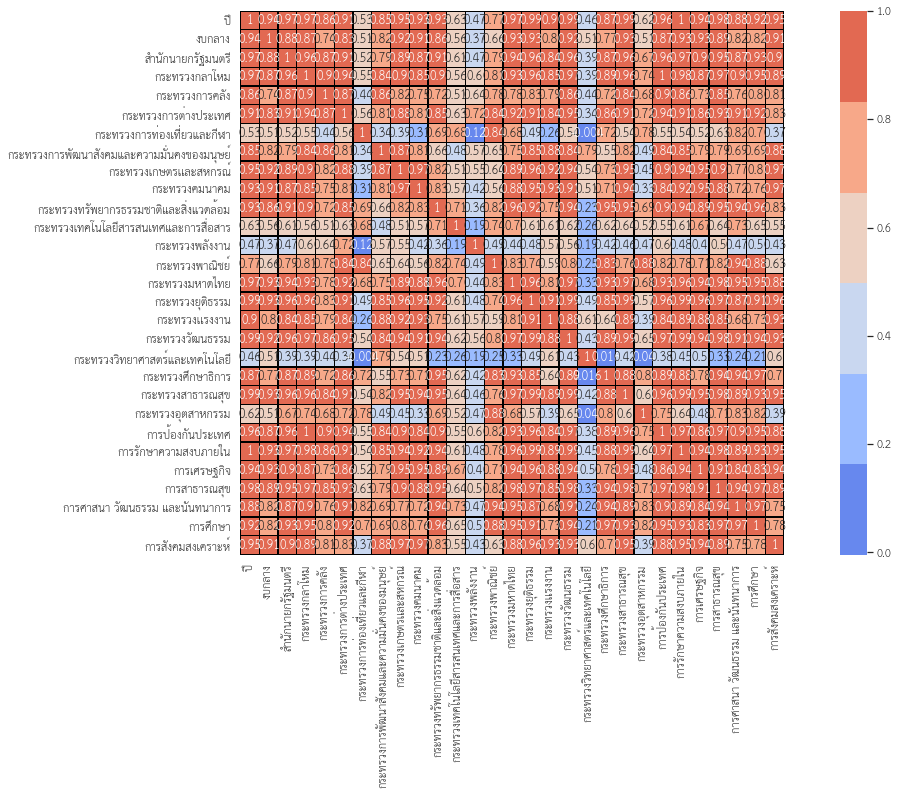

In [9]:
sns.heatmap(df.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
           cmap=sns.color_palette("coolwarm"),
           annot=True)

In [10]:
df.columns

Index(['ปี', 'งบกลาง', 'สำนักนายกรัฐมนตรี', 'กระทรวงกลาโหม', 'กระทรวงการคลัง',
       'กระทรวงการต่างประเทศ', 'กระทรวงการท่องเที่ยวและกีฬา',
       'กระทรวงการพัฒนาสังคมและความมั่นคงของมนุษย์', 'กระทรวงเกษตรเเละสหกรณ์',
       'กระทรวงคมนาคม', 'กระทรวงทรัพยากรธรรมชาติและสิ่งแวดล้อม',
       'กระทรวงเทคโนโลยีสารสนเทศและการสื่อสาร', 'กระทรวงพลังงาน',
       'กระทรวงพาณิชย์', 'กระทรวงมหาดไทย', 'กระทรวงยุติธรรม', 'กระทรวงเเรงงาน',
       'กระทรวงวัฒนธรรม', 'กระทรวงวิทยาศาสตร์และเทคโนโลยี',
       'กระทรวงศึกษาธิการ', 'กระทรวงสาธารณสุข', 'กระทรวงอุตสาหกรรม',
       'การป้องกันประเทศ', 'การรักษาความสงบภายใน', 'การเศรษฐกิจ',
       'การสาธารณสุข', 'การศาสนา วัฒนธรรม และนันทนาการ', 'การศึกษา',
       'การสังคมสงเคราะห์'],
      dtype='object')

In [11]:
import statsmodels.api as sm
X = df[['กระทรวงยุติธรรม','กระทรวงเกษตรเเละสหกรณ์','กระทรวงคมนาคม','กระทรวงสาธารณสุข','กระทรวงมหาดไทย']]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df[['การเศรษฐกิจ']], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            การเศรษฐกิจ   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     54.42
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.19e-07
Time:                        18:52:28   Log-Likelihood:                -197.22
No. Observations:                  17   AIC:                             406.4
Df Residuals:                      11   BIC:                             411.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
กระทรวงยุติธรรม            2

C:\Users\sinta\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
X = df[['กระทรวงมหาดไทย']]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df[['การเศรษฐกิจ']], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            การเศรษฐกิจ   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     112.5
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.29e-08
Time:                        18:52:28   Log-Likelihood:                -206.63
No. Observations:                  17   AIC:                             417.3
Df Residuals:                      15   BIC:                             418.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
กระทรวงมหาดไทย     1.4544      0.137     10.

C:\Users\sinta\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Part 1.2

In [13]:
X = df[['กระทรวงการคลัง','กระทรวงการท่องเที่ยวและกีฬา','กระทรวงเกษตรเเละสหกรณ์','กระทรวงพาณิชย์','กระทรวงอุตสาหกรรม']]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df[['การเศรษฐกิจ']], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            การเศรษฐกิจ   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     61.43
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           1.16e-07
Time:                        18:52:28   Log-Likelihood:                -196.22
No. Observations:                  17   AIC:                             404.4
Df Residuals:                      11   BIC:                             409.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
กระทรวงการคลัง    

C:\Users\sinta\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
X = df[['กระทรวงการคลัง','กระทรวงเกษตรเเละสหกรณ์']]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df[['การเศรษฐกิจ']], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            การเศรษฐกิจ   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     77.43
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.69e-08
Time:                        18:52:28   Log-Likelihood:                -203.66
No. Observations:                  17   AIC:                             413.3
Df Residuals:                      14   BIC:                             415.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
กระทรวงการคลัง            -0

C:\Users\sinta\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
X = df[['กระทรวงเกษตรเเละสหกรณ์']]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df[['การเศรษฐกิจ']], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            การเศรษฐกิจ   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     151.1
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           3.12e-09
Time:                        18:52:28   Log-Likelihood:                -204.39
No. Observations:                  17   AIC:                             412.8
Df Residuals:                      15   BIC:                             414.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
กระทรวงเกษตรเเละสหกรณ์     7

C:\Users\sinta\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Part 2

In [16]:
X = df[['กระทรวงยุติธรรม']]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df[['การป้องกันประเทศ']], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       การป้องกันประเทศ   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     155.8
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           2.52e-09
Time:                        18:52:28   Log-Likelihood:                -186.99
No. Observations:                  17   AIC:                             378.0
Df Residuals:                      15   BIC:                             379.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
กระทรวงยุติธรรม     9.5882      0.768     

C:\Users\sinta\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [17]:
X = df[['กระทรวงยุติธรรม']]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df[['การรักษาความสงบภายใน']], X)
results = model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     การรักษาความสงบภายใน   R-squared:                       0.988
Model:                              OLS   Adj. R-squared:                  0.987
Method:                   Least Squares   F-statistic:                     1190.
Date:                  Tue, 08 Mar 2022   Prob (F-statistic):           1.05e-15
Time:                          18:52:28   Log-Likelihood:                -168.24
No. Observations:                    17   AIC:                             340.5
Df Residuals:                        15   BIC:                             342.1
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
กระทรวงยุติธรรม     8.

C:\Users\sinta\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Part 3 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
import statsmodels.api as sm
X_linear = df[['กระทรวงการคลัง','กระทรวงเกษตรเเละสหกรณ์','กระทรวงพาณิชย์']]
X_linear = sm.add_constant(X_linear, prepend=False)
X_linear.head()

,กระทรวงการคลัง,กระทรวงเกษตรเเละสหกรณ์,กระทรวงพาณิชย์,const
0,131532.3509,53084.8043,4620.8538,1.0
1,140176.6018,52131.1367,4658.0021,1.0
2,144371.5171,55150.4657,4829.7984,1.0
3,172907.0925,64972.7696,5826.1381,1.0
4,180496.5578,65193.2776,6152.7260,1.0


In [20]:
y_linear = df[['การเศรษฐกิจ']]
y_linear.head()

,การเศรษฐกิจ
0,282325.2
1,296571.2
2,339783.5
3,332282.9
4,321879.7


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.05, random_state=99)

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
lm.coef_

array([[-1.56484363,  8.42454796, 30.12684815,  0.        ]])

In [24]:
lm.intercept_

array([-85489.72440508])

In [25]:
predictions = lm.predict(X_train)
predictions

array([[524400.11034219],
       [295109.95441599],
       [418161.26249727],
       [223241.86563781],
       [660134.13873278],
       [676656.74699126],
       [547436.43613892],
       [370929.94679973],
       [366647.52222946],
       [298715.77271101],
       [529368.81832355],
       [595836.23075848],
       [459935.11849311],
       [469587.67534837],
       [366827.10438825],
       [274667.99619181]])

In [26]:
metrics.r2_score(y_train,predictions)

0.9652863661082465

In [27]:
metrics.mean_squared_error(y_train,predictions)

646963070.9216092

In [28]:
metrics.mean_squared_error(y_train,predictions,squared=False)

25435.468757654322

In [29]:
metrics.mean_absolute_error(y_train,predictions)

22331.11063241613

In [30]:
metrics.mean_absolute_percentage_error(y_train,predictions)

0.05948886690239538

In [31]:
X_logarithm = np.log(df[['กระทรวงการคลัง','กระทรวงเกษตรเเละสหกรณ์','กระทรวงพาณิชย์']])
X_logarithm = sm.add_constant(X_logarithm, prepend=False)
X_logarithm.head()

,กระทรวงการคลัง,กระทรวงเกษตรเเละสหกรณ์,กระทรวงพาณิชย์,const
0,11.787008,10.879646,8.438335,1.0
1,11.850658,10.861518,8.446342,1.0
2,11.880145,10.917820,8.482560,1.0
3,12.060510,11.081724,8.670110,1.0
4,12.103467,11.085112,8.724651,1.0


In [32]:
y_logarithm = df[['การเศรษฐกิจ']]
y_logarithm.head()

,การเศรษฐกิจ
0,282325.2
1,296571.2
2,339783.5
3,332282.9
4,321879.7


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_logarithm, y_logarithm, test_size=0.05, random_state=99)

In [34]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
lm.coef_

array([[-229232.16661113,  670441.44127966,   47665.74700293,
              0.        ]])

In [36]:
lm.intercept_

array([-4700910.80403758])

In [37]:
predictions = lm.predict(X_train)
predictions

array([[519015.38999216],
       [293512.85975674],
       [428499.77244082],
       [210412.39222999],
       [654228.6038022 ],
       [657479.6568716 ],
       [546087.87869911],
       [384464.43012526],
       [372370.44285656],
       [299864.61387122],
       [538935.34155531],
       [601078.57049581],
       [471362.4905808 ],
       [455848.00573248],
       [377346.37813241],
       [267149.87285751]])

In [38]:
metrics.r2_score(y_train,predictions)

0.9489440511299098

In [39]:
metrics.mean_squared_error(y_train,predictions)

951537184.8654864

In [40]:
metrics.mean_squared_error(y_train,predictions,squared=False)

30846.996366996354

In [41]:
metrics.mean_absolute_error(y_train,predictions)

26543.788156746858

In [42]:
metrics.mean_absolute_percentage_error(y_train,predictions)

0.07166260969803873

In [43]:
X_expo = df[['กระทรวงการคลัง','กระทรวงเกษตรเเละสหกรณ์','กระทรวงพาณิชย์']]
X_expo = sm.add_constant(X_expo, prepend=False)
X_expo.head()

,กระทรวงการคลัง,กระทรวงเกษตรเเละสหกรณ์,กระทรวงพาณิชย์,const
0,131532.3509,53084.8043,4620.8538,1.0
1,140176.6018,52131.1367,4658.0021,1.0
2,144371.5171,55150.4657,4829.7984,1.0
3,172907.0925,64972.7696,5826.1381,1.0
4,180496.5578,65193.2776,6152.7260,1.0


In [44]:
y_expo = np.log(df[['การเศรษฐกิจ']])
y_expo.head()

,การเศรษฐกิจ
0,12.550815
1,12.600043
2,12.736064
3,12.713742
4,12.681933


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_expo, y_expo, test_size=0.05, random_state=99)

In [46]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [47]:
lm.coef_

array([[-4.87833667e-06,  1.94234234e-05,  1.10703915e-04,
         0.00000000e+00]])

In [48]:
lm.intercept_

array([11.71589659])

In [49]:
predictions = lm.predict(X_train)
predictions

array([[13.18482798],
       [12.61687274],
       [12.89625808],
       [12.41149233],
       [13.4104688 ],
       [13.4673972 ],
       [13.2187629 ],
       [12.77573365],
       [12.7827811 ],
       [12.61749216],
       [13.14704026],
       [13.27581409],
       [13.00213728],
       [13.07254134],
       [12.77936749],
       [12.56029214]])

In [50]:
metrics.r2_score(y_train,predictions)

0.9655736405630544

In [51]:
metrics.mean_squared_error(y_train,predictions)

0.0033949821907344473

In [52]:
metrics.mean_squared_error(y_train,predictions,squared=False)

0.05826647570202309

In [53]:
metrics.mean_absolute_error(y_train,predictions)

0.05028283868882755

In [54]:
metrics.mean_absolute_percentage_error(y_train,predictions)

0.0038965058045965276

In [55]:
X_power = np.log(df[['กระทรวงการคลัง','กระทรวงเกษตรเเละสหกรณ์','กระทรวงพาณิชย์']])
X_power = sm.add_constant(X_power, prepend=False)
X_power.head()

,กระทรวงการคลัง,กระทรวงเกษตรเเละสหกรณ์,กระทรวงพาณิชย์,const
0,11.787008,10.879646,8.438335,1.0
1,11.850658,10.861518,8.446342,1.0
2,11.880145,10.917820,8.482560,1.0
3,12.060510,11.081724,8.670110,1.0
4,12.103467,11.085112,8.724651,1.0


In [56]:
y_power = np.log(df[['การเศรษฐกิจ']])
y_power.head()

,การเศรษฐกิจ
0,12.550815
1,12.600043
2,12.736064
3,12.713742
4,12.681933


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_power, y_power, test_size=0.05, random_state=99)

In [58]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
lm.coef_

array([[-0.78986965,  1.55136412,  0.38784927,  0.        ]])

In [60]:
lm.intercept_

array([1.77443038])

In [61]:
predictions = lm.predict(X_train)
predictions

array([[13.17234617],
       [12.6153248 ],
       [12.91891642],
       [12.37859136],
       [13.40165845],
       [13.42762997],
       [13.21493106],
       [12.80511211],
       [12.79516292],
       [12.61813385],
       [13.16912907],
       [13.2910828 ],
       [13.02815743],
       [13.04038802],
       [12.80268376],
       [12.54003136]])

In [62]:
metrics.r2_score(y_train,predictions)

0.959989929104159

In [63]:
metrics.mean_squared_error(y_train,predictions)

0.003945624235702053

In [64]:
metrics.mean_squared_error(y_train,predictions,squared=False)

0.06281420409192537

In [65]:
metrics.mean_absolute_error(y_train,predictions)

0.054763047187149305

In [66]:
metrics.mean_absolute_percentage_error(y_train,predictions)

0.004265681868803963

## Part 4

In [67]:
df_finance = pd.read_excel("ยอดคงค้างสินทรัพย์และหนี้สินของรัฐบาลในประเทศ.xlsx")
df_finance

,ปี,เงินคงคลัง,ตราสารหนี้,พันธบัตร,ตั๋วสัญญาใช้เงิน,เงินกู้ยืม,อื่นๆ
0,2555,268043,3456129,3023700,412435,35581,19994
1,2556,325728,3724507,3334162,290325,51733,20021
2,2557,179324,3804725,3353070,371691,94149,19964
3,2558,386497,4205177,3720772,296801,143787,19903
4,2559,74907,4354416,4016102,298397,27636,19918
5,2560,180910,4849028,4296970,494635,101781,19923
6,2561,379898,5343729,4737808,585998,142233,19923
7,2562,316370,5502183,4939752,542508,173631,19923
8,2563,473001,6769725,5581029,733786,213567,15953


In [68]:
df_temp = df_budget[['ปี','กระทรวงการคลัง']][df_budget['ปี']>=2555]
df_temp.reset_index(drop=True,inplace=True)

In [69]:
df_temp

,ปี,กระทรวงการคลัง
0,2555,191415.1
1,2556,180707.9
2,2557,228796.6
3,2558,185852.2
4,2559,199174.1
5,2560,217713.6
6,2561,238241.6
7,2562,242948.0
8,2563,249676.0


In [70]:
df_finance = df_finance.join(df_temp[['กระทรวงการคลัง']])
df_finance.head()

,ปี,เงินคงคลัง,ตราสารหนี้,พันธบัตร,ตั๋วสัญญาใช้เงิน,เงินกู้ยืม,อื่นๆ,กระทรวงการคลัง
0,2555,268043,3456129,3023700,412435,35581,19994,191415.1
1,2556,325728,3724507,3334162,290325,51733,20021,180707.9
2,2557,179324,3804725,3353070,371691,94149,19964,228796.6
3,2558,386497,4205177,3720772,296801,143787,19903,185852.2
4,2559,74907,4354416,4016102,298397,27636,19918,199174.1


In [71]:
df_finance.columns

Index(['ปี', 'เงินคงคลัง', 'ตราสารหนี้', 'พันธบัตร', 'ตั๋วสัญญาใช้เงิน',
       'เงินกู้ยืม', 'อื่นๆ', 'กระทรวงการคลัง'],
      dtype='object')

In [72]:
X = df_finance[['เงินคงคลัง','ตราสารหนี้','พันธบัตร','ตั๋วสัญญาใช้เงิน', 'เงินกู้ยืม', 'อื่นๆ']]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df_finance[['กระทรวงการคลัง']], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         กระทรวงการคลัง   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     4.805
Date:                Tue, 08 Mar 2022   Prob (F-statistic):              0.182
Time:                        18:52:29   Log-Likelihood:                -91.543
No. Observations:                   9   AIC:                             197.1
Df Residuals:                       2   BIC:                             198.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
เงินคงคลัง          -0.1000      0.067  

C:\Users\sinta\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [73]:
X = df_finance[['เงินคงคลัง','ตั๋วสัญญาใช้เงิน', 'เงินกู้ยืม']]
X = sm.add_constant(X, prepend=False)
model = sm.OLS(df_finance[['กระทรวงการคลัง']], X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         กระทรวงการคลัง   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     14.05
Date:                Tue, 08 Mar 2022   Prob (F-statistic):            0.00717
Time:                        18:52:29   Log-Likelihood:                -93.755
No. Observations:                   9   AIC:                             195.5
Df Residuals:                       5   BIC:                             196.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
เงินคงคลัง          -0.1157      0.045  

C:\Users\sinta\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
